## Pandas Miniproject - Let's Code Academy

The company you work for, PyCoders Ltda., wishes to expand its operation
to the movie market and made a deal with Netflix, being the responsible for
for a survey on the movies which currently exist, a very broad task.

Luckily, the company managed to contact IMDb about acquiring data,
making it possible to access part of their database.

Netflix doesn't know exactly what to expect of your work, thus, initially, you have
to decide by yourselves how to best explore the data and bring forth insights which
may help improve the business of the video streaming company.

Team:\
Edson da Silva Grimello\
André Pereira de Godoy\
Marcelo Jannarelli Urquiza\
Pedro Henrique Leme Colella\
Gabriel Zinato Rosa

In [1]:
#Loading the libraries we used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import plotly.graph_objects as go

plt.style.use('ggplot')

In [2]:
#Reading the csv files
df_rating=pd.read_csv("IMDb_ratings.csv")
df_movies=pd.read_csv("IMDb_movies.csv")
df_names=pd.read_csv("IMDb_names.csv")

In [3]:
#We observed we can combine these two files and they even have the same movies (imdb_title_id)
display(df_rating)
display(df_movies)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,7.2,219,8.1,9.0,86,37,33,15,17,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,7.8,510,7.8,9.0,184,80,91,39,10,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,8.4,604,8.1,9.0,280,80,101,31,9,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,8.4,369,8.2,9.0,111,74,74,61,30,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Inspecting the variables
display(df_rating.describe())
display(df_movies.describe())

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,81273.000000,8.127300e+04,81273.000000,81273.000000,8.127300e+04,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,...,80409.000000,80409.000000,78701.000000,78701.000000,80667.000000,80667.000000,81034.000000,81034.000000,81269.000000,81269.000000
mean,5.926587,9.421771e+03,6.259578,6.304055,1.222871e+03,1192.843527,2019.657365,2076.640545,1335.426156,694.539355,...,6.103064,635.330672,6.064022,184.702024,5.139347,77.299974,5.967583,1676.121468,5.775737,4371.879487
std,1.243315,5.220245e+04,1.161615,1.492902,1.221412e+04,11427.311637,13386.328821,10384.089767,5818.537290,2868.639078,...,1.452682,3350.118823,1.542429,771.842552,1.315429,127.173472,1.322301,8450.086745,1.295955,23093.245801
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.060000e+02,5.600000,6.000000,2.200000e+01,9.000000,18.000000,29.000000,30.000000,22.000000,...,5.300000,10.000000,5.300000,6.000000,4.300000,12.000000,5.200000,24.000000,5.100000,97.000000
50%,6.100000,4.950000e+02,6.400000,7.000000,5.400000e+01,25.000000,52.000000,79.000000,76.000000,52.000000,...,6.300000,27.000000,6.300000,16.000000,5.300000,28.000000,6.200000,84.500000,6.000000,233.000000
75%,6.800000,1.865000e+03,7.100000,7.000000,2.050000e+02,120.000000,250.000000,357.000000,296.000000,182.000000,...,7.000000,111.000000,7.000000,63.000000,6.000000,77.000000,6.900000,362.000000,6.700000,895.000000
max,10.000000,2.159628e+06,10.000000,10.000000,1.197087e+06,596808.000000,397945.000000,231381.000000,135547.000000,72485.000000,...,10.000000,114034.000000,10.000000,30244.000000,10.000000,936.000000,10.000000,341457.000000,10.000000,862970.000000


,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


In [5]:
# Changing the index to a same column on both dataframes
df_rating.set_index('imdb_title_id',inplace=True)
df_movies.set_index('imdb_title_id',inplace=True)

In [6]:
# Verifying wether or not both dataframes have the same index
sum(df_movies.index==df_rating.index)

81273

In [7]:
#Combining both data frames
df_movies_ratings=df_movies.join(df_rating,on="imdb_title_id")

In [8]:
#Inspecting the new dataframe, we see a lot of null values
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      81273 non-null  object 
 1   original_title             81273 non-null  object 
 2   year                       81273 non-null  int64  
 3   date_published             81273 non-null  object 
 4   genre                      81273 non-null  object 
 5   duration                   81273 non-null  int64  
 6   country                    81234 non-null  object 
 7   language                   80518 non-null  object 
 8   director                   81200 non-null  object 
 9   writer                     79780 non-null  object 
 10  production_company         76948 non-null  object 
 11  actors                     81207 non-null  object 
 12  description                78843 non-null  object 
 13  avg_vote                   81273 non-nu

In [9]:
# Cleaning the data
# Replacing the null values with "no_info"
df_movies_ratings.replace(np.nan, 'no_info',inplace=True)

In [10]:
#No more null values
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      81273 non-null  object 
 1   original_title             81273 non-null  object 
 2   year                       81273 non-null  int64  
 3   date_published             81273 non-null  object 
 4   genre                      81273 non-null  object 
 5   duration                   81273 non-null  int64  
 6   country                    81273 non-null  object 
 7   language                   81273 non-null  object 
 8   director                   81273 non-null  object 
 9   writer                     81273 non-null  object 
 10  production_company         81273 non-null  object 
 11  actors                     81273 non-null  object 
 12  description                81273 non-null  object 
 13  avg_vote                   81273 non-nu

In [11]:
#Now we can start working on the problem itself. How to best survey these movies in search
#of the ones Netflix should acquire in order to attract more customers and keep their current
#customer base?

#Idea 1) Let's correlate the names of the movies with their actors, the ratings and its genre.
#Idea 2) We may want to work with the language and country columns to see which are the best movies
#from each country and each language.
df2=df_movies_ratings[["title","actors","mean_vote","total_votes","genre","country","language","year"]].reset_index()
df_languages=df_movies_ratings[["title","actors","mean_vote","total_votes","genre","country","language","year"]].reset_index()
df_countries=df_movies_ratings[["title","actors","mean_vote","total_votes","genre","country","language","year"]].reset_index()
display(df2.head(10))
display(df_languages.head(10))
display(df_countries.head(10))

,imdb_title_id,title,actors,mean_vote,total_votes,genre,country,language,year
0,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.3,537,"Biography, Crime, Drama",Australia,no_info,1906
1,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",6.1,171,Drama,"Germany, Denmark",no_info,1911
2,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,"Drama, History",USA,English,1912
3,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",6.9,2019,"Adventure, Drama, Fantasy",Italy,Italian,1911
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.8,438,"Biography, Drama",USA,English,1912
5,tt0002423,Madame DuBarry,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...",6.8,709,"Biography, Drama, Romance",Germany,German,1919
6,tt0002445,Quo Vadis?,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...",6.2,241,"Drama, History",Italy,Italian,1913
7,tt0002452,Independenta Romaniei,"Aristide Demetriade, Constanta Demetriade, Con...",7.1,187,"History, War",Romania,no_info,1912
8,tt0002461,Richard III,"Robert Gemp, Frederick Warde, Albert Gardner, ...",5.4,211,Drama,"France, USA",English,1912
9,tt0002646,Atlantis,"Olaf Fønss, Ida Orloff, Ebba Thomsen, Carl Lau...",6.6,310,Drama,Denmark,Danish,1913


,imdb_title_id,title,actors,mean_vote,total_votes,genre,country,language,year
0,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.3,537,"Biography, Crime, Drama",Australia,no_info,1906
1,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",6.1,171,Drama,"Germany, Denmark",no_info,1911
2,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,"Drama, History",USA,English,1912
3,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",6.9,2019,"Adventure, Drama, Fantasy",Italy,Italian,1911
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.8,438,"Biography, Drama",USA,English,1912
5,tt0002423,Madame DuBarry,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...",6.8,709,"Biography, Drama, Romance",Germany,German,1919
6,tt0002445,Quo Vadis?,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...",6.2,241,"Drama, History",Italy,Italian,1913
7,tt0002452,Independenta Romaniei,"Aristide Demetriade, Constanta Demetriade, Con...",7.1,187,"History, War",Romania,no_info,1912
8,tt0002461,Richard III,"Robert Gemp, Frederick Warde, Albert Gardner, ...",5.4,211,Drama,"France, USA",English,1912
9,tt0002646,Atlantis,"Olaf Fønss, Ida Orloff, Ebba Thomsen, Carl Lau...",6.6,310,Drama,Denmark,Danish,1913


,imdb_title_id,title,actors,mean_vote,total_votes,genre,country,language,year
0,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.3,537,"Biography, Crime, Drama",Australia,no_info,1906
1,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",6.1,171,Drama,"Germany, Denmark",no_info,1911
2,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,"Drama, History",USA,English,1912
3,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",6.9,2019,"Adventure, Drama, Fantasy",Italy,Italian,1911
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.8,438,"Biography, Drama",USA,English,1912
5,tt0002423,Madame DuBarry,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...",6.8,709,"Biography, Drama, Romance",Germany,German,1919
6,tt0002445,Quo Vadis?,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...",6.2,241,"Drama, History",Italy,Italian,1913
7,tt0002452,Independenta Romaniei,"Aristide Demetriade, Constanta Demetriade, Con...",7.1,187,"History, War",Romania,no_info,1912
8,tt0002461,Richard III,"Robert Gemp, Frederick Warde, Albert Gardner, ...",5.4,211,Drama,"France, USA",English,1912
9,tt0002646,Atlantis,"Olaf Fønss, Ida Orloff, Ebba Thomsen, Carl Lau...",6.6,310,Drama,Denmark,Danish,1913


In [12]:
# We'll use split and explode on the genre column, the language column and the countries column:
#Genre:
df2['genre'] = df2['genre'].str.split(', ')
df2_explode = df2.explode('genre').set_index('imdb_title_id')

#Language:
df_languages['language'] = df_languages['language'].str.split(', ')
df_languages= df_languages.explode("language").set_index('imdb_title_id')

#Country:
df_countries["country"] = df_countries["country"].str.split(", ")
df_countries = df_countries.explode("country").set_index("imdb_title_id")


In [13]:
#Another idea we had is to search for the main movies of each actor/actress, the ratings of the movies and the genres:

# Searching for the movies of an actor/actress:

nome_ator = input("Insert the name of an actor or actress.\n")
df_busca_ator=df2_explode.copy()
df_busca_ator["actors"]=df_busca_ator["actors"].str.split(", ")


#This data frame is the result of the search
df_busca_ator = df_busca_ator[df_busca_ator["actors"].apply(lambda x: True if nome_ator in x else False)]

# We decided to order the movies according to the total of votes
# because the movies with the most votes are probably the most popular
df_busca_ator.sort_values(by=['total_votes'],ascending=False)

# Sum of the genres of movies the actor/actress played a role in:
print("The most common genres of movies are:")
display(df_busca_ator['genre'].value_counts()) 
print("Played a role in the following movies:")
dfmedia=df_busca_ator.groupby("title").head(1)
display(dfmedia[["title","year","mean_vote","total_votes"]].sort_values(by=["total_votes","mean_vote"],ascending=False).set_index("title"))
media=dfmedia["mean_vote"].mean()
print(f"\n\nThe mean of the ratings of these movies is: {media}")

Insert the name of an actor or actress.
Heath Ledger
The most common genres of movies are:


Drama        9
Romance      5
Action       5
Comedy       4
Adventure    4
Biography    3
Crime        2
Thriller     2
History      1
Horror       1
Mystery      1
Sport        1
Music        1
Name: genre, dtype: int64

Played a role in the following movies:


,year,mean_vote,total_votes
title,,,
The Dark Knight,2008,8.9,2134569
Brokeback Mountain,2005,7.7,305649
10 Things I Hate About You,1999,7.5,276216
The Patriot,2000,7.3,241601
A Knight's Tale,2001,7.1,160625
The Brothers Grimm,2005,6.0,112085
Monster's Ball,2001,7.1,79546
I'm Not There,2007,7.1,54579
Casanova,2005,6.7,50071




The mean of the ratings of these movies is: 7.121428571428572


In [14]:
#We can also find the top 25 movies released in a given year, their ratings and genres
#We decided to sort these movies by total votes first because there would be a huge
#bias otherwise (movies with few votes are less popular and can have high ratings more easily)
ano_de_busca = int(input("Insert a year.\n"))
df2_explode[df2_explode["year"]==ano_de_busca].groupby("title").head(1).sort_values(["total_votes","mean_vote"],ascending=False).head(25)

Insert a year.
1989


,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt0097576,Indiana Jones and the Last Crusade,"Harrison Ford, Sean Connery, Denholm Elliott, ...",8.2,648838,Action,USA,"English, German, Greek, Arabic",1989
tt0096874,Back to the Future Part II,"Michael J. Fox, Christopher Lloyd, Lea Thompso...",7.9,440176,Adventure,USA,English,1989
tt0097165,Dead Poets Society,"Robin Williams, Robert Sean Leonard, Ethan Haw...",8.1,383245,Comedy,USA,"English, Latin",1989
tt0096895,Batman,"Michael Keaton, Jack Nicholson, Kim Basinger, ...",7.6,320326,Action,"USA, UK","English, French, Spanish",1989
tt0097757,The Little Mermaid,"Rene Auberjonois, Christopher Daniel Barnes, J...",7.7,220055,Animation,USA,"English, French",1989
tt0098635,When Harry Met Sally...,"Billy Crystal, Meg Ryan, Carrie Fisher, Bruno ...",7.7,181280,Comedy,USA,English,1989
tt0097428,Ghostbusters II,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",6.6,171670,Action,USA,English,1989
tt0096754,The Abyss,"Ed Harris, Mary Elizabeth Mastrantonio, Michae...",7.6,154141,Adventure,USA,English,1989
tt0097733,Lethal Weapon 2,"Mel Gibson, Danny Glover, Joe Pesci, Joss Ackl...",7.3,152051,Action,USA,"English, Afrikaans",1989


In [15]:
#Now we'll look for the top 25 movies given a genre, the ratings of the movies and
#the year in which they were released

genero = input("Insert a movie genre\n").title()
df2_explode[df2_explode["genre"]==genero].groupby("title").head(1).sort_values(["total_votes","mean_vote"],ascending=False).head(25)

Insert a movie genre
Action


,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt0468569,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.9,2134569,Action,"USA, UK","English, Mandarin",2008
tt1375666,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.7,1892929,Action,"USA, UK","English, Japanese, French",2010
tt0133093,The Matrix,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.5,1554261,Action,USA,English,1999
tt1345836,The Dark Knight Rises,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",8.5,1421494,Action,"UK, USA","English, Arabic",2012
tt0372784,Batman Begins,"Christian Bale, Michael Caine, Liam Neeson, Ka...",8.3,1225020,Action,"USA, UK","English, Urdu, Mandarin",2005
tt0076759,Star Wars,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",8.5,1147198,Action,USA,English,1977
tt0080684,Star Wars: Episode V - The Empire Strikes Back,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",8.6,1078687,Action,USA,English,1980
tt0499549,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1066602,Action,USA,"English, Spanish",2009
tt2015381,Guardians of the Galaxy,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",8.1,980782,Action,USA,English,2014


### About the countries which were part of the production of these movies:

In [16]:
#Countries which participated the most in movie productions:
df_countries["country"].value_counts().head(10)

USA          32993
France        7976
UK            7059
India         5826
Italy         4754
Germany       3589
Japan         3439
Canada        3407
Spain         2587
Hong Kong     1827
Name: country, dtype: int64

In [17]:
#Extracting the list of countries in order to make a mask for the dataframe
df_countries["country"].value_counts().head(10).index

Index(['USA', 'France', 'UK', 'India', 'Italy', 'Germany', 'Japan', 'Canada',
       'Spain', 'Hong Kong'],
      dtype='object')

In [18]:
#Filtering the dataframe to show only movies from the chosen countries
df_countries_filter=df_countries[df_countries["country"].apply(lambda x: True if x in ['USA', 'France', 'UK', 'India', 'Italy', 'Germany', 'Japan', 'Canada',
       'Spain', 'Hong Kong'] else False)]

In [19]:
#Verifying the result
df_countries_filter["country"].value_counts()

USA          32993
France        7976
UK            7059
India         5826
Italy         4754
Germany       3589
Japan         3439
Canada        3407
Spain         2587
Hong Kong     1827
Name: country, dtype: int64

In [20]:
#Countries ranked by the mean of the ratings of the movies they helped produce
#and by mean of the total of votes.

#Observation 1) The countries whose movies pleased the audience the most are the ones in the first
#dataframe, which shows the mean of the ratings, even if these countries don't produce the most popular
#movies (they have a smaller audience but are very entertaining for their audience). The most popular movies
#are the ones produced by the countries ranked in the second dataframe (total_votes).

df_countries_media_plot=df_countries_filter.groupby("country")[["mean_vote"]].mean().sort_values(["mean_vote"],ascending=False)
df_countries_total_plot=df_countries_filter.groupby("country")[["total_votes"]].sum().sort_values(["total_votes"],ascending=False)
display(df_countries_media_plot)
display(df_countries_total_plot)

#It's probably a good idea for Netflix to keep a good catalog of movies from the countries shown in the
#ratings dataframe (India, Japan, France, Germany, Hong Kong, etc.) since, even though less people have
#watched them, less people had access to them and they pleased their audiences a lot (high ratings).


,mean_vote
country,
India,6.768795
Japan,6.692149
France,6.460481
Germany,6.366899
Hong Kong,6.319048
UK,6.289134
Italy,6.249201
Spain,6.240588
USA,6.014964


,total_votes
country,
USA,642111481
UK,142065160
France,62261709
Germany,61301078
Canada,46450538
Japan,24543925
India,20369137
Italy,18683590
Spain,15607803


In [21]:
#Selecting the 3 movies with the best ratings from each of these countries, we observe
#many have few votes, which indicates they are very entertaining but not very popular.

df_countries_filter.sort_values("mean_vote",ascending=False).groupby("country").head(3).sort_values(["country","mean_vote"],ascending=False)

,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt6735740,Love in Kilnerry,"Daniel Keith, Kathy Searle, Tony Triano, James...",10.0,2360,Comedy,USA,English,2019
tt6226212,Sand Angels,"Britt Flatmo, Isabella Blake-Thomas, Cassie Br...",9.6,676,Family,USA,English,2018
tt5951832,Pretty Outrageous,"Isabella Blake-Thomas, Gabe Eggerling, Jaime A...",9.4,664,"Comedy, Family",USA,English,2017
tt0379790,The Freediver,"Alki David, Adam Baldwin, Camilla Rutherford, ...",9.2,1452,"Action, Adventure",UK,English,2004
tt4156348,The Crucible,"Richard Armitage, Harry Attwell, Samantha Coll...",9.0,358,Drama,UK,English,2014
tt8259916,The Last Guest,"Jenny, Chazz Ravenelle, Joe Griffin, Jamien Ch...",9.0,685,"Adventure, Comedy, Crime",UK,English,2017
tt5591278,Yerma: Barren,"Rebecca Grant, Miriam Díaz-Aroca, Mundy Rieu J...",8.8,263,Drama,Spain,English,2017
tt4729430,Klaus,"Rashida Jones, Joan Cusack, J.K. Simmons, Jaso...",8.7,4616,"Animation, Adventure, Comedy",Spain,"English, Spanish",2019
tt0060196,"Il buono, il brutto, il cattivo","Eli Wallach, Clint Eastwood, Lee Van Cleef, Al...",8.7,640904,Western,Spain,"Italian, English, Spanish",1966


In [22]:
#Most popular movies selecting 3 movies per country:
df_countries_filter.sort_values("total_votes",ascending=False).groupby("country").head(3).sort_values(["country","total_votes"],ascending=False)

,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt0111161,The Shawshank Redemption,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.1,2159628,Drama,USA,English,1994
tt0468569,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.9,2134569,"Action, Crime, Drama",USA,"English, Mandarin",2008
tt1375666,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.7,1892929,"Action, Adventure, Sci-Fi",USA,"English, Japanese, French",2010
tt0468569,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.9,2134569,"Action, Crime, Drama",UK,"English, Mandarin",2008
tt1375666,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.7,1892929,"Action, Adventure, Sci-Fi",UK,"English, Japanese, French",2010
tt1345836,The Dark Knight Rises,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",8.5,1421494,"Action, Thriller",UK,"English, Arabic",2012
tt0060196,"Il buono, il brutto, il cattivo","Eli Wallach, Clint Eastwood, Lee Van Cleef, Al...",8.7,640904,Western,Spain,"Italian, English, Spanish",1966
tt0440963,The Bourne Ultimatum,"Matt Damon, Julia Stiles, David Strathairn, Sc...",8.1,585160,"Action, Mystery, Thriller",Spain,"English, French, Arabic, Russian, Spanish",2007
tt0457430,Pan's Labyrinth,"Ivana Baquero, Sergi López, Maribel Verdú, Dou...",8.1,583872,"Drama, Fantasy, War",Spain,Spanish,2006


### Analisys: Considering the language of the movies, which ones should Netflix consider?

In [23]:
#Languages in which the movies are released in more frequently
df_languages.groupby("title")["language"].head(100).value_counts().head(10)

English      45503
French        7832
Spanish       5341
Italian       4380
German        4309
Japanese      3637
Hindi         2831
Russian       2618
Mandarin      1860
Cantonese     1528
Name: language, dtype: int64

In [24]:
#Extracting the list of these languages to make a mask for the dataframe
df_languages["language"].value_counts().head(10).index

Index(['English', 'French', 'Spanish', 'Italian', 'German', 'Japanese',
       'Hindi', 'Russian', 'Mandarin', 'Cantonese'],
      dtype='object')

In [25]:
#Filtering the dataframe to show only the movies released in the chosen languages
df_languages_filter=df_languages[df_languages["language"].apply(lambda x: True if x in ['English',
'French', 'Spanish', 'Italian', 'German', 'Japanese', 'Hindi', 'Russian', 'Mandarin', 'Cantonese'] else False)]

In [26]:
#Verifying the result
df_languages_filter["language"].value_counts()

English      45503
French        7832
Spanish       5341
Italian       4380
German        4309
Japanese      3637
Hindi         2831
Russian       2618
Mandarin      1860
Cantonese     1528
Name: language, dtype: int64

In [27]:
#Languages ranked considering the mean of the ratings of its movies and the total sum of votes

df_languages_media_plot=df_languages_filter.groupby("language")[["mean_vote"]].mean().sort_values(["mean_vote"],ascending=False)
df_languages_total_plot=df_languages_filter.groupby("language")[["total_votes"]].sum().sort_values(["total_votes"],ascending=False)
display(df_languages_media_plot)
display(df_languages_total_plot)

,mean_vote
language,
Japanese,6.689497
Russian,6.677998
German,6.488977
French,6.472370
Hindi,6.462911
Spanish,6.415896
Mandarin,6.410108
Cantonese,6.339202
Italian,6.313562


,total_votes
language,
English,705289782
French,104988698
Spanish,97215480
German,62721612
Italian,50680599
Russian,43378227
Japanese,37478090
Mandarin,23489797
Hindi,18742931


## Similarly to the results obtained when we analysed the movies considering the countries which participated in their production, we observe that the movies which please their audience the most are the ones released in the languages ranked in dataframe "df_languages_media_plot", in other words, the ones with the highest ratings, even if they do not rank as the languages in which the most popular movies were released.

In [28]:
#When we select the 3 movies with the best mean of ratings from each of these languages,
#we observe many have few votes, which indicates they please very much a very small audience.

df_languages_filter.sort_values("mean_vote",ascending=False).groupby("language").head(3).sort_values(["language","mean_vote"],ascending=False)

,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt5870084,Más que hermanos,"Drew Fuller, Valerie Domínguez, Robin Duran, M...",9.4,1186,Drama,"Panama, USA, Argentina",Spanish,2017
tt1784603,Retorno,"Cristián Almarza, Pablo Donetch, Felipe Grandó...",9.1,111,"Crime, Mystery, Sci-Fi",Chile,Spanish,2010
tt4295126,Maikol Yordan de Viaje Perdido,"Mario Chacón, Daniel Moreno, Erik Hernández Ga...",8.9,1675,Comedy,Costa Rica,Spanish,2014
tt10715974,Shindisi,"Goga Pipinashvili, Dato Bakhtadze, Tamar Abshi...",9.4,180,"Drama, History, War",Georgia,Russian,2019
tt2640460,Kurmanjan datka,"Elina Abai Kyzy, Nasira Mambetova, Aziz Muradi...",9.3,3244,"Action, Biography, Drama",Kyrgyzstan,Russian,2014
tt0169828,Jariskatsis mama,"Sergo Zakariadze, Vladimir Privaltsev, Aleksan...",9.1,3633,"Drama, War",Soviet Union,Russian,1965
tt0468569,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.9,2134569,"Action, Crime, Drama","USA, UK",Mandarin,2008
tt0055233,Ningen no jôken,"Tatsuya Nakadai, Michiyo Aratama, Tamao Nakamu...",8.6,4244,"Drama, History, War",Japan,Mandarin,1961
tt7717440,9 Satra,"Kanokchat Manyaton, Savitree Suttichanond, Sir...",8.6,1106,Animation,Thailand,Mandarin,2018


In [29]:
#Most popular movies considering 3 movies from each language:
df_languages_filter.sort_values("total_votes",ascending=False).groupby("language").head(3).sort_values(["language","total_votes"],ascending=False)

,title,actors,mean_vote,total_votes,genre,country,language,year
imdb_title_id,,,,,,,,
tt0110912,Pulp Fiction,"Tim Roth, Amanda Plummer, Laura Lovelace, John...",8.7,1695085,"Crime, Drama",USA,Spanish,1994
tt0499549,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1066602,"Action, Adventure, Fantasy",USA,Spanish,2009
tt0071562,The Godfather: Part II,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",8.8,1032047,"Crime, Drama",USA,Spanish,1974
tt0848228,The Avengers,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.1,1206904,"Action, Adventure, Sci-Fi",USA,Russian,2012
tt1392190,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",8.0,805017,"Action, Adventure, Sci-Fi","Australia, USA, South Africa",Russian,2015
tt0208092,Snatch,"Benicio Del Toro, Dennis Farina, Vinnie Jones,...",8.3,734539,"Comedy, Crime","UK, USA",Russian,2000
tt0468569,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.9,2134569,"Action, Crime, Drama","USA, UK",Mandarin,2008
tt0372784,Batman Begins,"Christian Bale, Michael Caine, Liam Neeson, Ka...",8.3,1225020,"Action, Adventure","USA, UK",Mandarin,2005
tt3659388,The Martian,"Matt Damon, Jessica Chastain, Kristen Wiig, Je...",8.0,701756,"Adventure, Drama, Sci-Fi","UK, USA, Hungary",Mandarin,2015


# Part 2 - Data Visualization

On the first part of this project, we used the data from IMDb to extract insights which could help Netflix
plan their catalog of movies, shows and new productions. Now that we've gathered some data, we can plot the
data to make charts which can illustrate these insights in a visual manner. For this purpose, we'll use the analysis we've already done on the base and plot, at least, 8 charts which can represent interesting relations
between the data available. Be creative and use this part of the project to enrich what was done on the first part.

Here are some examples of what can be done:

* Considering the four main genres of movies, plot a distribution chart with the ratings of each of them;
* Plot a pie chart considering the distribution of the 6 main genres of movies since 2010 and grouping the rest as "Others"
* Which is the annual average rating of a given genre of movie?
* Which is the difference between ratings given by men and women in some of the genres of movies? Tip: histograms and boxplots can be useful.

Feel free to extract any visualizations you consider interesting! It's our role to be curious and to test hipothesis which may not be obvious.

Work on the details of the charts, such as the axes, legend, styles, etc. A beautiful chart will always grab the attention of the viewers.

Be creative!

In [30]:
#We'll separate the years in periods to plot the charts:

df_partido,bins = pd.cut(df2_explode['year'],bins=8, retbins=True)
display(bins)

period = ['1905 to 1920',
          '1921 to 1934',
          '1935 to 1948',
          '1949 to 1962',
          '1963 to 1976',
          '1977 to 1990',
          '1991 to 2004',
          '2005 to 2019']
df2_explode['periods'] = pd.cut(df2_explode['year'], bins = bins, labels = period)

array([1905.887, 1920.125, 1934.25 , 1948.375, 1962.5  , 1976.625,
       1990.75 , 2004.875, 2019.   ])

In [31]:
# Considering the four main genres of movies, plot the distribution of ratings of each one of them.

display(df2_explode['genre'].value_counts())
df_genero=df2_explode[(df2_explode['genre']=="Drama")|(df2_explode['genre']=="Comedy")|(df2_explode['genre']=="Romance")|(df2_explode['genre']=="Action")]
df_genero.groupby(["genre","periods"])[["mean_vote","total_votes"]].mean()

Drama          44404
Comedy         27873
Romance        13379
Action         12106
Thriller       10814
Crime          10461
Horror          9041
Adventure       7082
Mystery         4839
Family          3694
Fantasy         3599
Sci-Fi          3474
Biography       2275
History         2178
War             2172
Animation       2021
Musical         1991
Western         1571
Music           1566
Sport           1006
Film-Noir        667
Adult              2
Documentary        2
Reality-TV         2
Game-Show          1
News               1
Name: genre, dtype: int64

mean_vote   total_votes
genre   periods                              
Action  1905 to 1920   6.713333    733.400000
        1921 to 1934   6.483696   2646.260870
        1935 to 1948   6.461975   1072.758025
        1949 to 1962   6.340126   2972.250000
        1963 to 1976   6.332153   3430.727520
        1977 to 1990   6.038474  11736.763320
        1991 to 2004   5.882602  22096.911906
        2005 to 2019   5.961040  27531.786633
Comedy  1905 to 1920   6.650877    685.000000
        1921 to 1934   6.797043   2104.219130
        1935 to 1948   6.722148   1659.193289
        1949 to 1962   6.730079   2188.792876
        1963 to 1976   6.421624   2780.659406
        1977 to 1990   6.280611   6705.505042
        1991 to 2004   6.178931  11744.635551
        2005 to 2019   6.035673   9911.298516
Drama   1905 to 1920   6.611111    912.392157
        1921 to 1934   6.780456   1600.022787
        1935 to 1948   6.760496   3116.701166
        1949 to 1962   6.821746   3625.052789
        1963 to 1976   6.731196   4518.686518
        1977 to 1990   6.688372   6109.622449
        1991 to 2004   6.535457  12954.811471
        2005 to 2019   6.450555   9803.220680
Romance 1905 to 1920   6.608696    870.847826
        1921 to 1934   6.786322   1520.434650
        1935 to 1948   6.738143   2666.375000
        1949 to 1962   6.760606   3447.613881
        1963 to 1976   6.734773   2326.634352
        1977 to 1990   6.579716   5608.196160
        1991 to 2004   6.403045  10891.034936
        2005 to 2019   6.305739   9143.878422

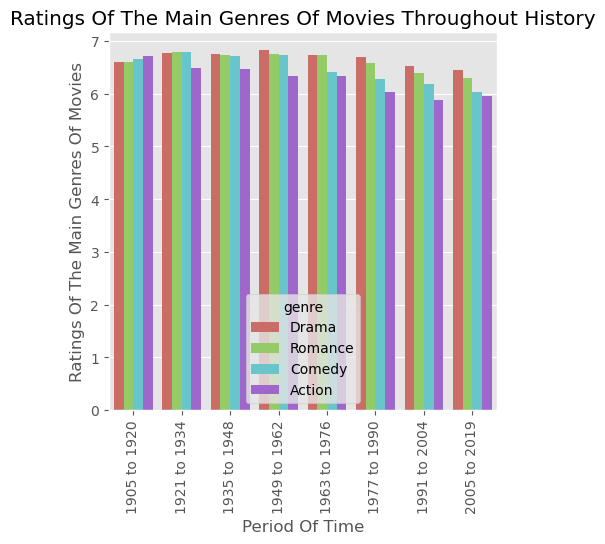

In [32]:
#Plotting the chart
plt.figure(figsize=(5,5),dpi=100)
figura=sns.barplot(x=df_genero['periods'],y=df_genero['mean_vote'],hue=df_genero['genre'],ci=None,palette="hls")
plt.xlabel("Period of Time".title())
plt.ylabel("Ratings of the Main Genres of Movies".title())
plt.title("Ratings of the Main Genres of Movies Throughout History".title())
plt.xticks(rotation=90);

## In terms of the mean of the ratings, the Drama genre has been more relevant in recent times, even if it's not the main genre in terms of total votes. Interpretation: These movies have been more entertaining/pleasant but less people watch them.

## In Brazil, a survey by Ancine (the national cinema agency) for the years 2009 through 2017 confirms the result of the chart, since Action, Comedy, Drama, Horror and Documentaries were the most watched genres of movies in Brazil in that period of time, although it considered a public of 9 million viewers only. 

## We conclude that keeping a good selection of movies based on these genres has a great possibility of increasing the number of viewers Netflix has.

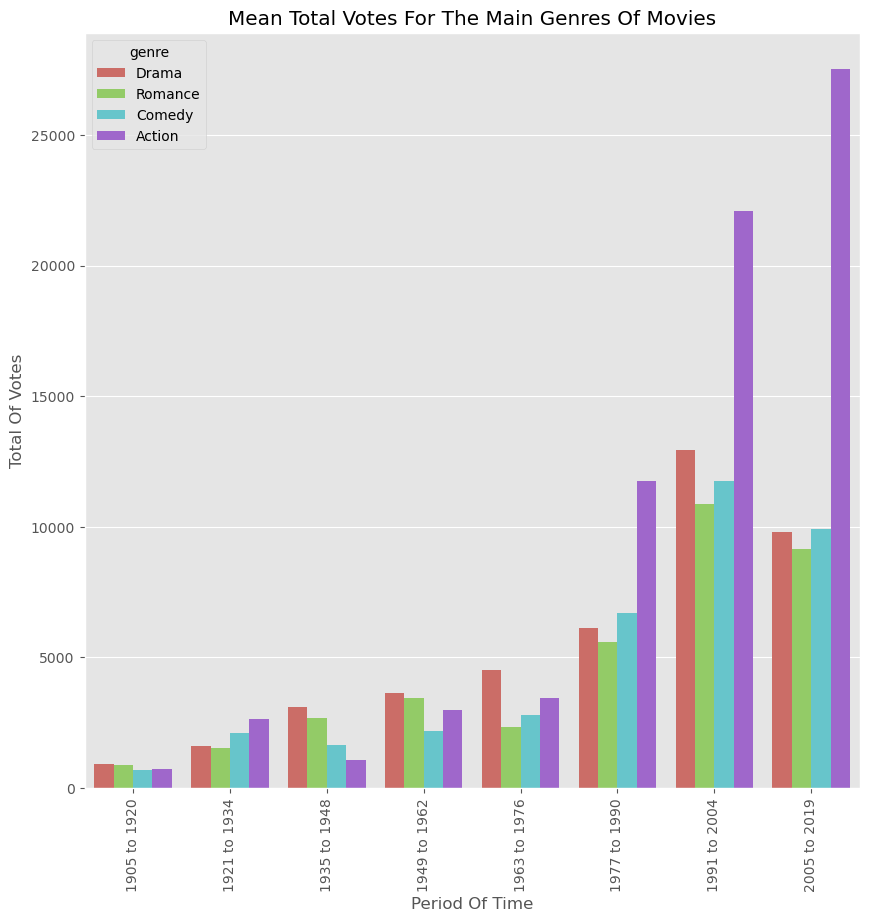

In [33]:
#Plotando as contagens de votos dos principais gêneros
plt.figure(figsize=(10,10),dpi=100)
figura=sns.barplot(x=df_genero['periods'],y=df_genero['total_votes'],hue=df_genero['genre'],ci=None,palette="hls")
plt.xlabel("Period of Time".title())
plt.ylabel("Total of Votes".title())
plt.title("Mean Total Votes for the Main Genres of Movies".title())
plt.xticks(rotation=90);

## As the chart shows, in terms of average popularity of the movies of each genre, the Action genre has been very dominant in recent times, meaning it's a good idea for Netflix to keep a good catalog of Action movies.

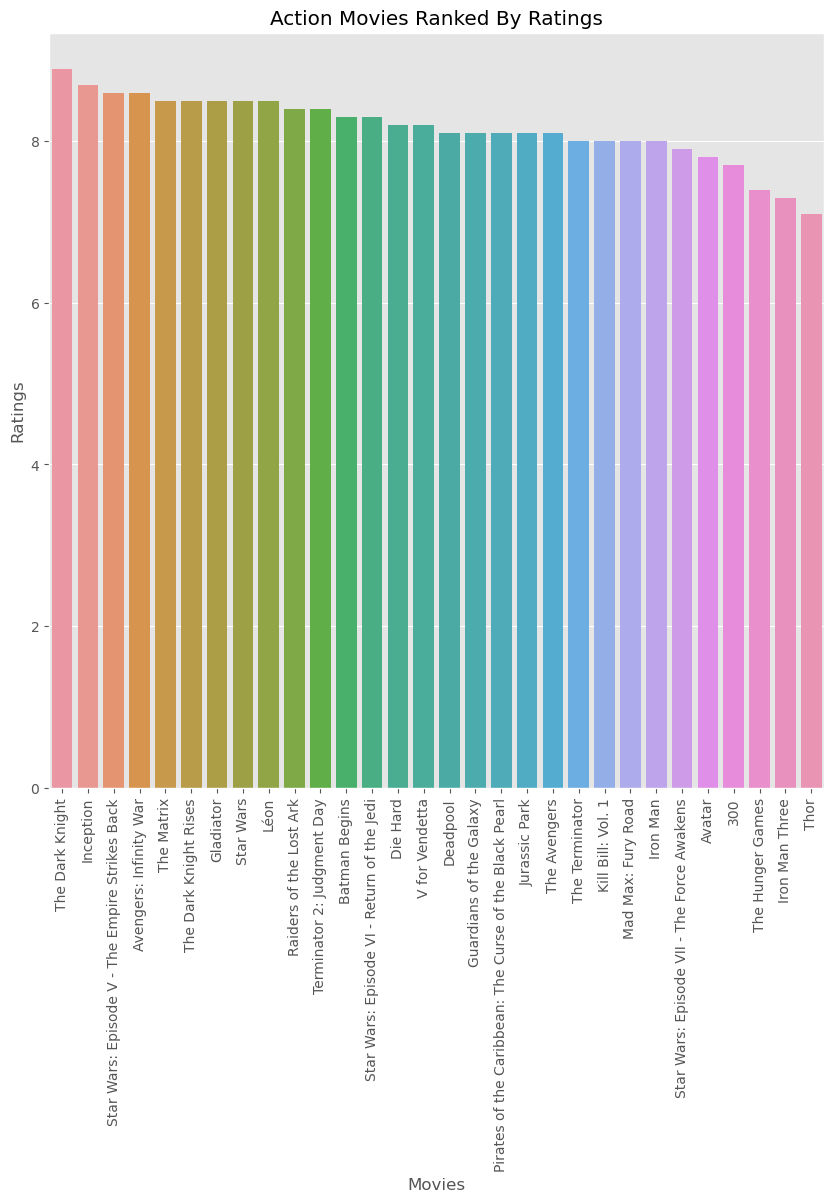

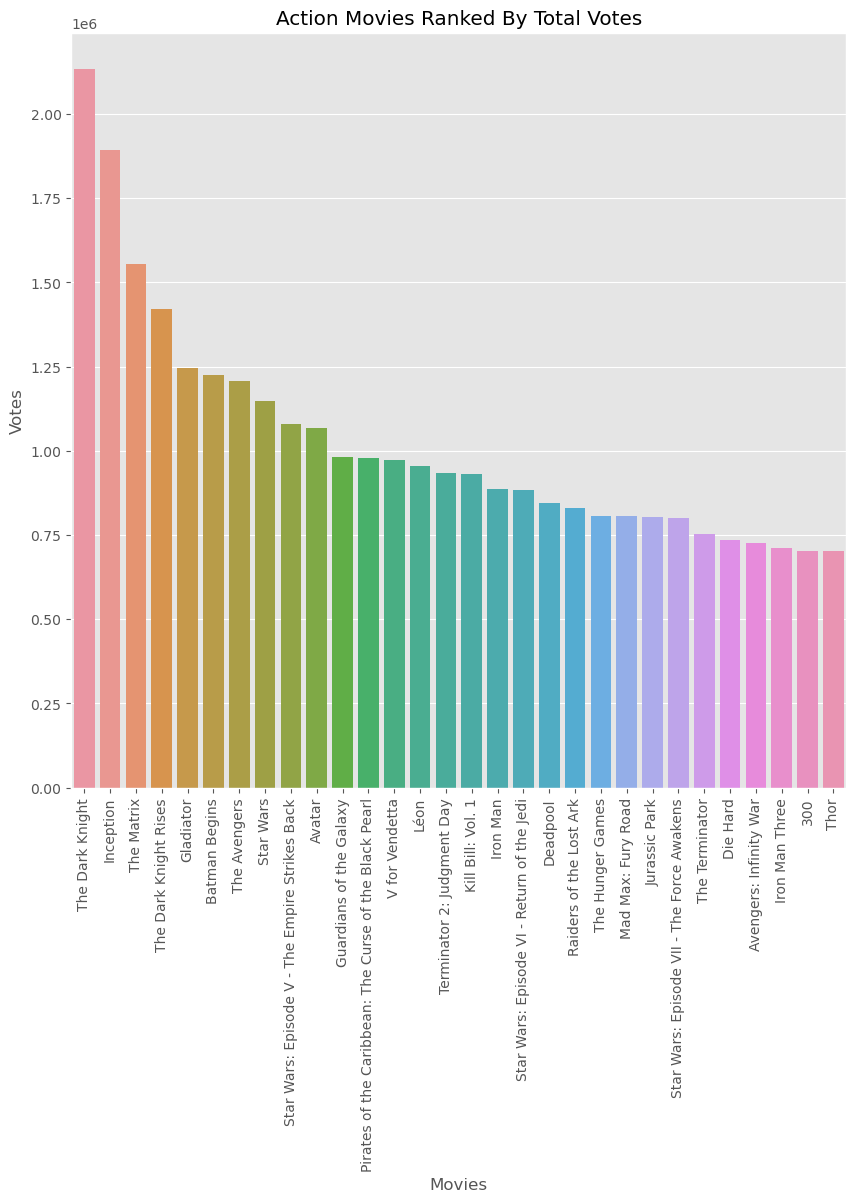

In [34]:
#Ratings and Total Votes of each Action Movie
filmes_acao=df2_explode[df2_explode["genre"]=="Action"].sort_values("total_votes",ascending=False).head(30)
filmes_acao_nota=filmes_acao.sort_values(by="mean_vote",ascending=False)
plt.figure(figsize=(10,10),dpi=100)
figura=sns.barplot(x=filmes_acao_nota['title'],y=filmes_acao_nota['mean_vote'],ci=None)
plt.xlabel("Movies")
plt.ylabel("Ratings")
plt.title("Action Movies Ranked by Ratings".title())
plt.xticks(rotation=90);
plt.show()
plt.figure(figsize=(10,10),dpi=100)
figura=sns.barplot(x=filmes_acao['title'],y=filmes_acao['total_votes'],ci=None)
plt.xlabel("Movies")
plt.ylabel("Votes")
plt.title("Action Movies Ranked by Total Votes".title())
plt.xticks(rotation=90);
plt.show()

In [35]:
#Preparing the data to plot the pie chart and other charts

df4=df_movies_ratings
df4['genre'] = df4['genre'].str.split(',')
df4_explode = df4.explode('genre')
df4_explode['genre'] = df4_explode['genre'].str.lstrip()
df4_explode['males_allages_avg_vote'].replace('no_info', 0.0, inplace=True)
df4_explode['females_allages_avg_vote'].replace('no_info', 0.0, inplace=True)
df4_explode['females_allages_votes'].replace('no_info', 0.0, inplace=True)
df4_explode['males_allages_votes'].replace('no_info', 0.0, inplace=True)


#Main genres of movies considering the quantity of movies since 2010
display(df2_explode[df2_explode["year"]>=2010]["genre"].value_counts().head(6))

df_pj2=df2_explode[df2_explode["year"]>=2010].copy(deep=True)

df_pj2["genre"]=df_pj2["genre"].apply(lambda x: x if x in ['Drama',
                                                           'Comedy',
                                                           'Thriller',
                                                           'Action',
                                                           'Horror',
                                                           'Romance'] else "Outro")

#Main genres after applying the mask
display(df_pj2["genre"].value_counts())
display(df_pj2)

Drama       14122
Comedy       8633
Thriller     4673
Action       4110
Horror       3786
Romance      3565
Name: genre, dtype: int64

Drama       14122
Outro       13754
Comedy       8633
Thriller     4673
Action       4110
Horror       3786
Romance      3565
Name: genre, dtype: int64

,title,actors,mean_vote,total_votes,genre,country,language,year,periods
imdb_title_id,,,,,,,,,
tt0069049,The Other Side of the Wind,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",6.8,5014,Drama,"France, Iran, USA","English, German",2018,2005 to 2019
tt0085953,Mo tai,"Eddie Chan, Yung-Chang Chin, Pak-Kwong Ho, Men...",6.3,262,Horror,Hong Kong,Cantonese,2019,2005 to 2019
tt0100275,La Telenovela Errante,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",6.6,121,Comedy,Chile,Spanish,2017,2005 to 2019
tt0100275,La Telenovela Errante,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",6.6,121,Drama,Chile,Spanish,2017,2005 to 2019
tt0100275,La Telenovela Errante,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",6.6,121,Outro,Chile,Spanish,2017,2005 to 2019
...,...,...,...,...,...,...,...,...,...
tt9905412,Ottam,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...",7.8,510,Drama,India,Malayalam,2019,2005 to 2019
tt9905462,Pengalila,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",8.1,604,Drama,India,Malayalam,2019,2005 to 2019
tt9911774,Padmavyuhathile Abhimanyu,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",8.2,369,Drama,India,Malayalam,2019,2005 to 2019


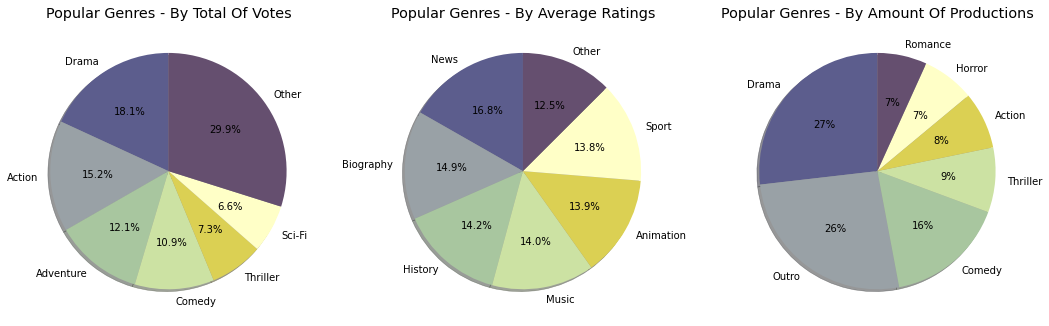

<Figure size 504x504 with 0 Axes>

In [36]:
#Plotting the pie chart

#1) Slicing the database to consider only data since 2010

genre_maior_2010 = df4_explode[df4_explode['year']>2010]

#Grouping considering genre of movies and sorting considering total votes

df_soma_votos = genre_maior_2010.groupby(['genre']).sum().sort_values('total_votes', ascending=False).reset_index()

# Grouping considering the average ratings
df_media_votos = genre_maior_2010.groupby(['genre']).mean().sort_values('avg_vote', ascending=False).reset_index()

# Grouping data since 2010 and creating the "Other" genre
df_soma_votos_6 = df_soma_votos.drop([0,1,2,3,4,5])
df_media_votos_6 = df_media_votos.drop([0,1,2,3,4,5])

other_avg_vote = df_media_votos_6['avg_vote'].mean()
other_total_votes = df_soma_votos_6['total_votes'].sum()
d=[['Other', other_avg_vote, other_total_votes]]
df_other = pd.DataFrame(d, columns=['genre','avg_vote', 'total_votes'], index=['6'])
list = []
for item in df_media_votos.index[6:]:
    list.append(item)

df_soma_votos = df_soma_votos.drop(list)
df_soma_votos = pd.concat([df_soma_votos, df_other])
df_media_votos = df_media_votos.drop(list)
df_media_votos = pd.concat([df_media_votos, df_other])

#Plotting axes[0] - most popular genre considering the sum of votes

fig, axes = plt.subplots(1, 3, figsize=(18,18), subplot_kw=dict(aspect="equal"))
colors = ['#5c5d8d','#99a1a6', '#a8c69f', '#CCE2A3', '#DBD053', '#FFFFC7', '#654f6f']
labels = df_soma_votos['genre']
wedges, texts, autotexts = axes[0].pie(df_soma_votos['total_votes'], labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].set_title('Popular Genres - By Total of Votes'.title());

#Plotting axes[1] - most popular genre considering average ratings

colors = ['#5c5d8d','#99a1a6', '#a8c69f', '#CCE2A3', '#DBD053', '#FFFFC7', '#654f6f']
labels = df_media_votos['genre']
wedges, texts, autotexts = axes[1].pie(df_media_votos['avg_vote'], labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].set_title('Popular Genres - By Average Ratings'.title());

#Plotting axes[2] - most popular genre considering amount of productions

labels = df_pj2["genre"].value_counts().index
plt.figure(figsize=(7,7))
plt.tight_layout()
axes[2].pie(df_pj2["genre"].value_counts(), startangle=90, colors=colors, autopct='%1.f%%',labels=labels,shadow= True);
axes[2].set_title('Popular Genres - By Amount of Productions'.title());

## Despite the fact that the Action genre is the most popular, having a high demand in streaming services and movie theaters, we observe the genres with the most productions and total votes are actually Comedy and Drama. This is justified by the fact that these productions require much smaller budgets than those of the Action genre, especially the Hollywood action movies.

## It's a wise idea for Netflix to invest in Drama and Comedy productions since they're cheaper and very popular.

## Charts of the analysis considering languages and countries:

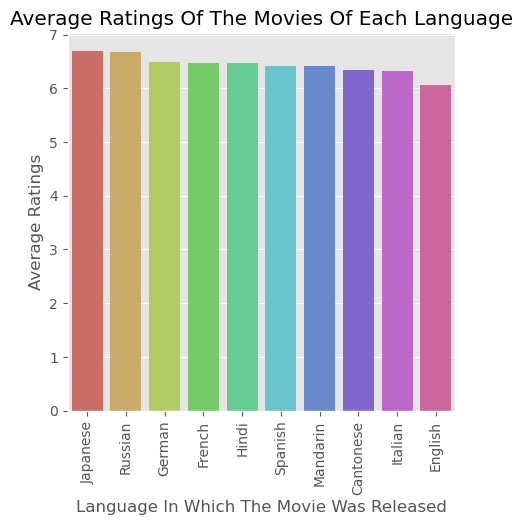

In [37]:
plt.figure(figsize=(5,5),dpi=100)
figura=sns.barplot(x=df_languages_media_plot.index,y=df_languages_media_plot['mean_vote'],ci=None,palette="hls")
plt.xlabel("Language in which the movie was released".title())
plt.ylabel("Average Ratings".title())
plt.title("Average Ratings of the Movies of each Language".title())
plt.xticks(rotation=90);
plt.show()

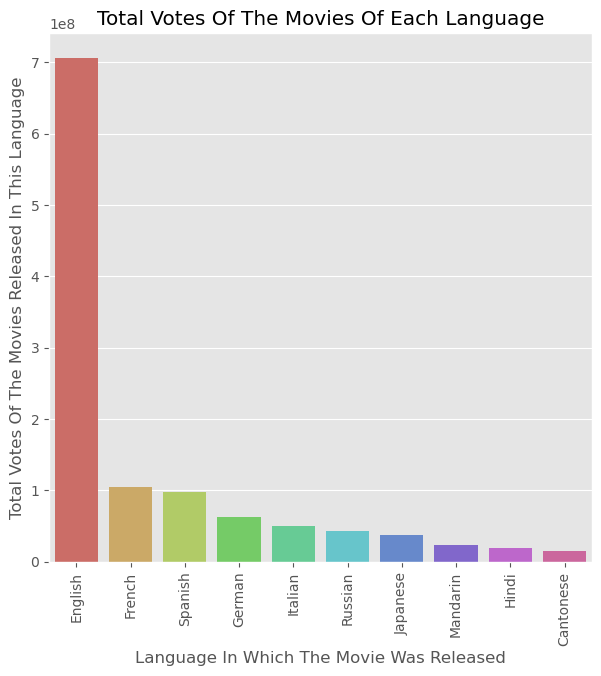

In [38]:
plt.figure(figsize=(7,7),dpi=100)
figura=sns.barplot(x=df_languages_total_plot.index,y=df_languages_total_plot['total_votes'],ci=None,palette="hls")
plt.xlabel("Language in which the movie was released".title())
plt.ylabel("Total votes of the movies released in this language".title())
plt.title("Total Votes of the Movies of Each Language".title())
plt.xticks(rotation=90);
plt.show()

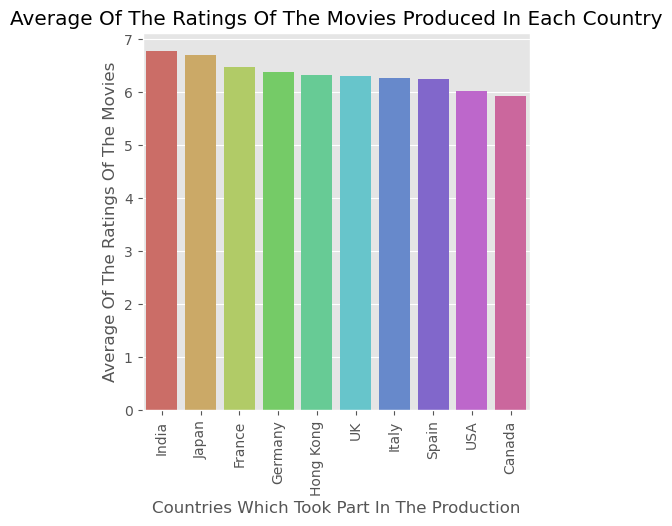

In [39]:
plt.figure(figsize=(5,5),dpi=100)
figura=sns.barplot(x=df_countries_media_plot.index,y=df_countries_media_plot['mean_vote'],ci=None,palette="hls")
plt.xlabel("Countries which took part in the production".title())
plt.ylabel("Average of the Ratings of the Movies".title())
plt.title("Average of the Ratings of the Movies Produced in each Country".title())
plt.xticks(rotation=90);
plt.show()

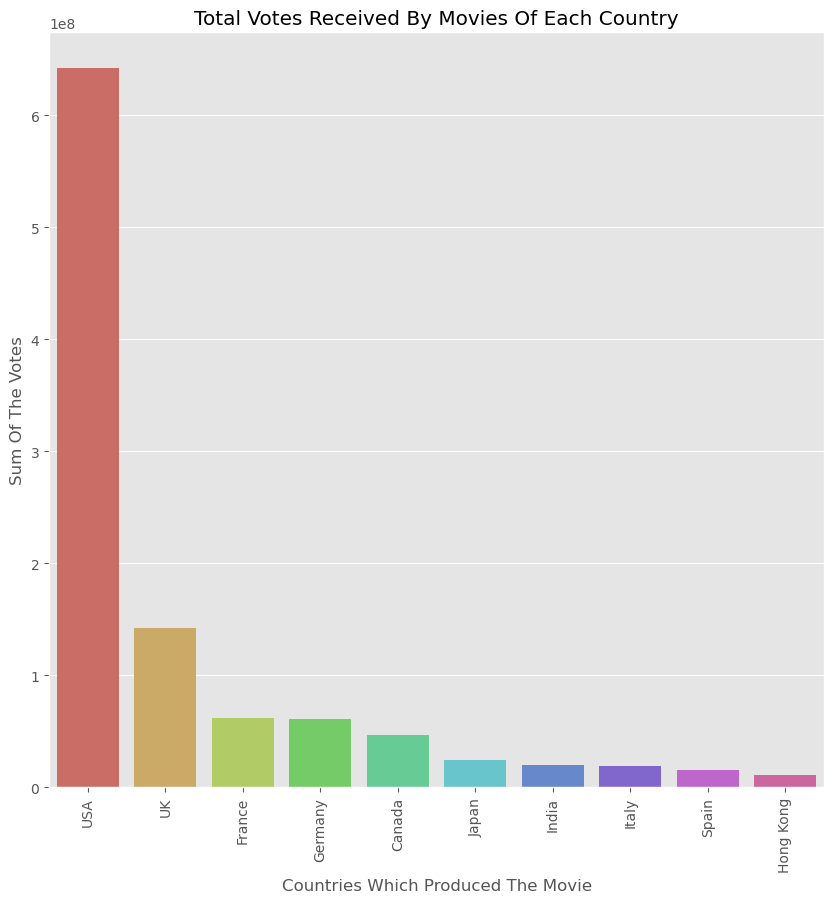

In [40]:
plt.figure(figsize=(10,10),dpi=100)
figura=sns.barplot(x=df_countries_total_plot.index,y=df_countries_total_plot['total_votes'],ci=None,palette="hls")
plt.xlabel("Countries which produced the movie".title())
plt.ylabel("Sum of the votes".title())
plt.title("Total Votes received by movies of each country".title())
plt.xticks(rotation=90);
plt.show()

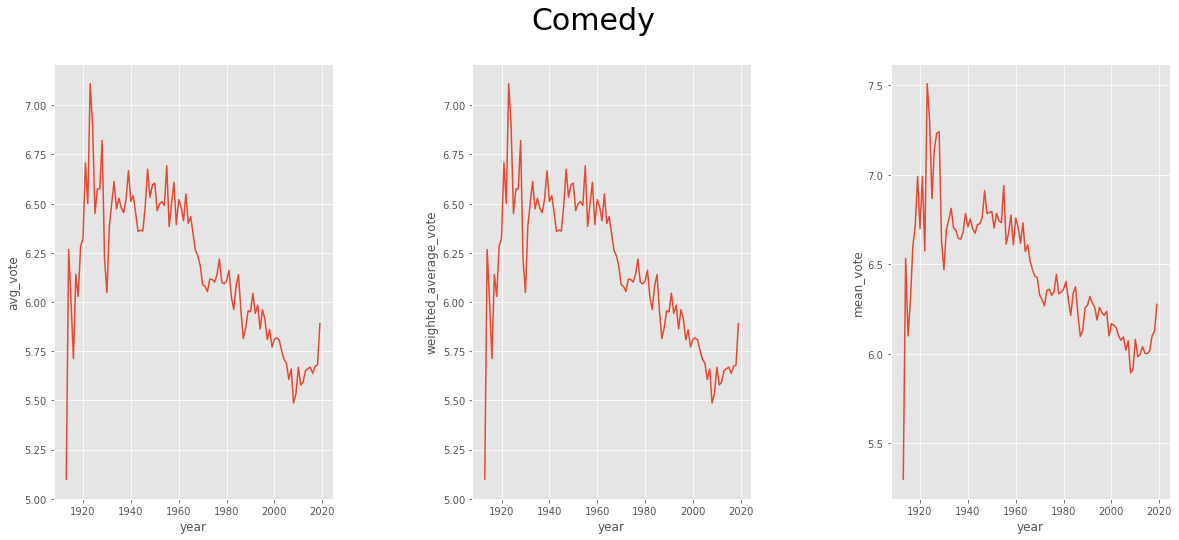

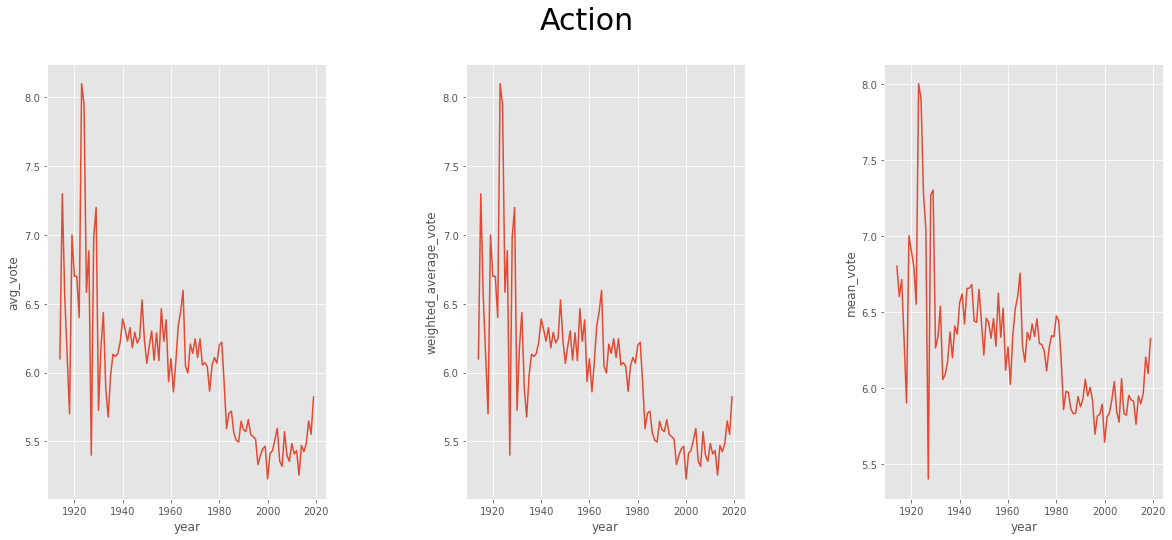

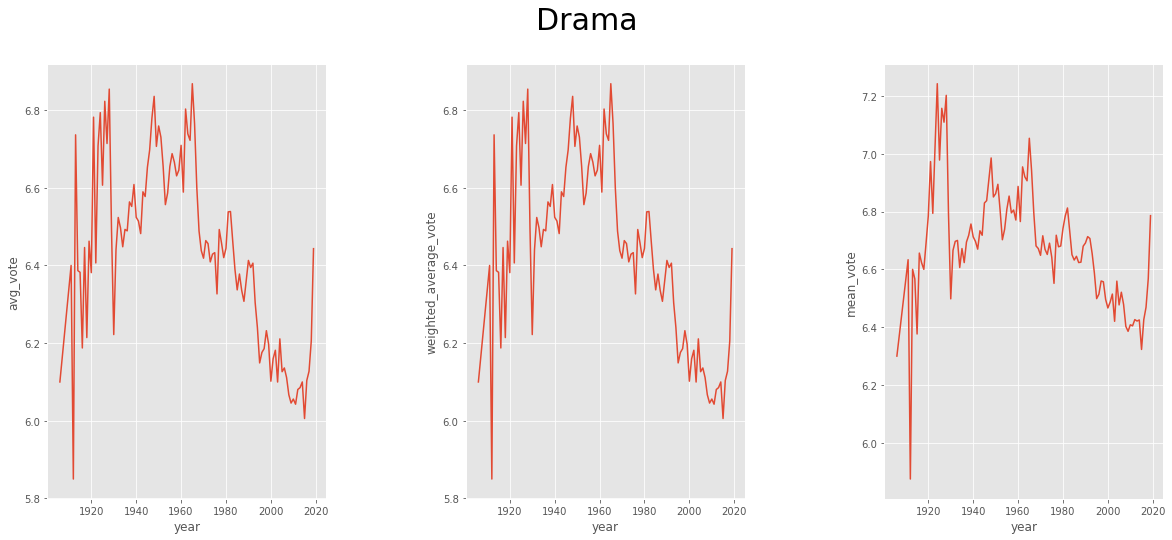

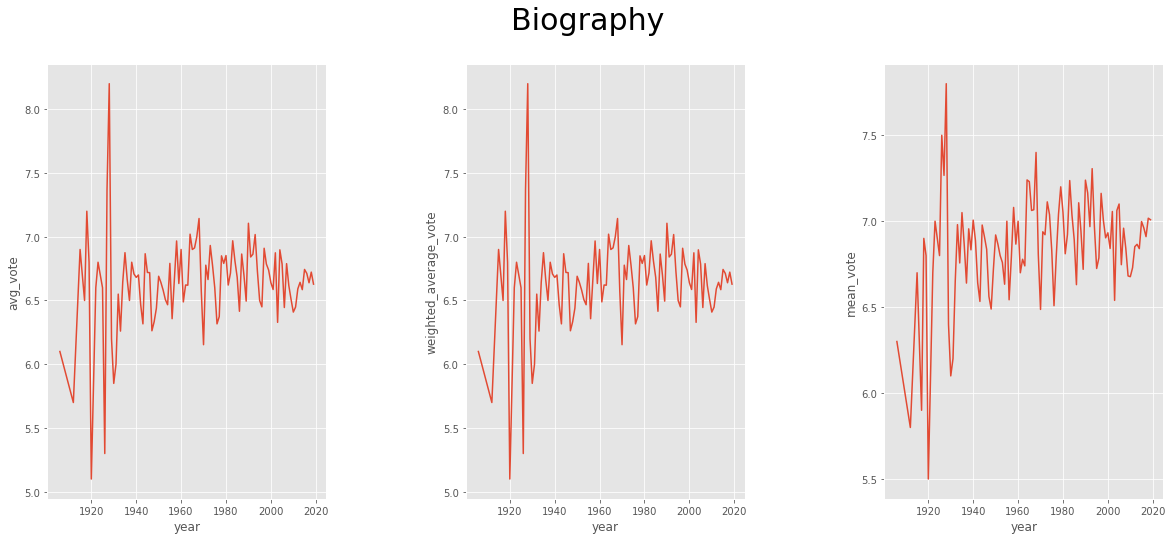

In [41]:
#Which is the annual average rating of each genre of movie?

#Creating dataframes for each of the 4 main genres
df5 = df4_explode[df4_explode['genre'] == 'Comedy']
df6 = df4_explode[df4_explode['genre'] == 'Action']
df7 = df4_explode[df4_explode['genre'] == 'Drama']
df8 = df4_explode[df4_explode['genre'] == 'Biography']

#Creating the dataframes which show the average numbers grouped by year
comedy_avg_year = df5.groupby(['year']).mean()
action_avg_year = df6.groupby(['year']).mean()
drama_avg_year = df7.groupby(['year']).mean()
biography_avg_year = df8.groupby(['year']).mean()

#Plotting for Comedy
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Comedy', fontsize=30)
sns.lineplot(data=comedy_avg_year, x='year', y='avg_vote', ax = axes[0])
sns.lineplot(data=comedy_avg_year, x='year', y='weighted_average_vote', ax = axes[1])
sns.lineplot(data=comedy_avg_year, x='year', y='mean_vote', ax = axes[2])

#Plotting for Action
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Action', fontsize=30)
sns.lineplot(data=action_avg_year, x='year', y='avg_vote', ax = axes[0])
sns.lineplot(data=action_avg_year, x='year', y='weighted_average_vote', ax = axes[1])
sns.lineplot(data=action_avg_year, x='year', y='mean_vote', ax = axes[2])

#Plotting for Drama
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Drama', fontsize=30)
sns.lineplot(data=drama_avg_year, x='year', y='avg_vote', ax = axes[0])
sns.lineplot(data=drama_avg_year, x='year', y='weighted_average_vote', ax = axes[1])
sns.lineplot(data=drama_avg_year, x='year', y='mean_vote', ax = axes[2])

#Plotting for Biography
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Biography', fontsize=30)
sns.lineplot(data=biography_avg_year, x='year', y='avg_vote', ax = axes[0])
sns.lineplot(data=biography_avg_year, x='year', y='weighted_average_vote', ax = axes[1])
sns.lineplot(data=biography_avg_year, x='year', y='mean_vote', ax = axes[2]);

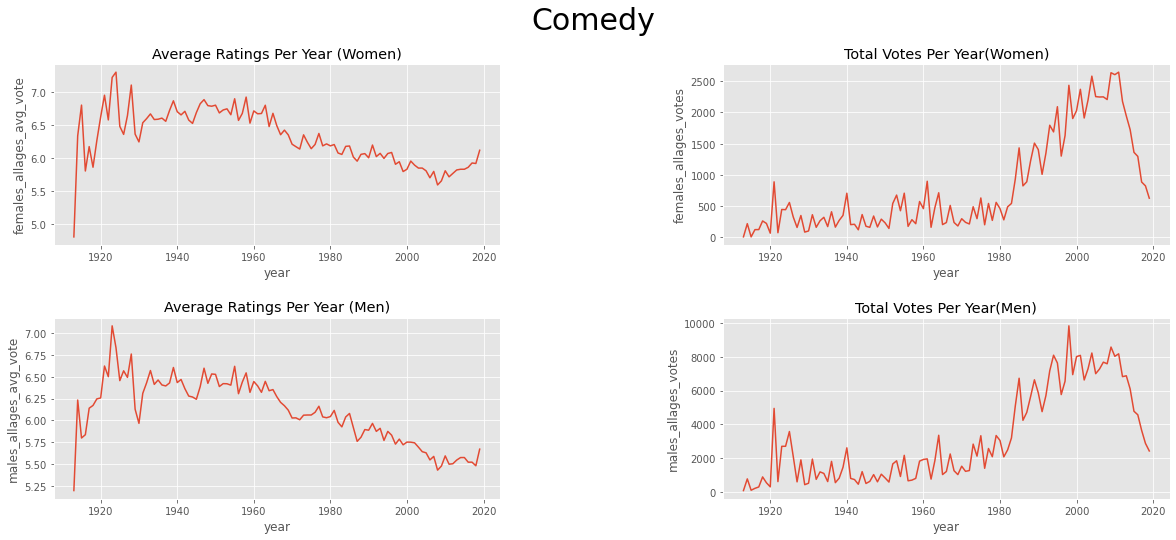

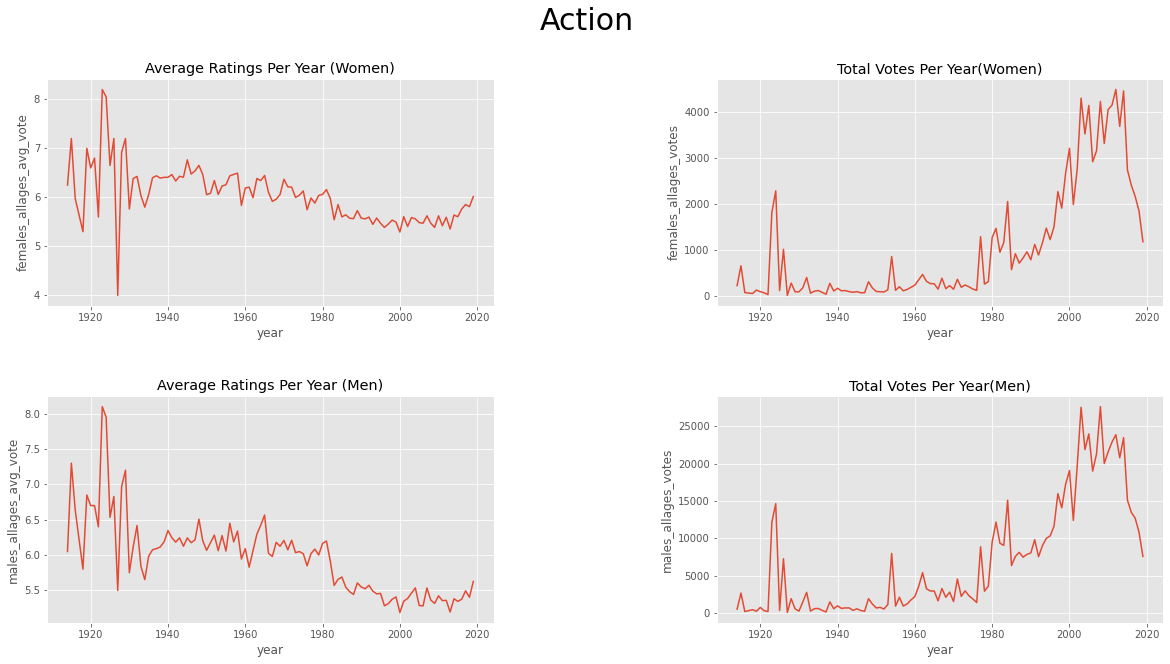

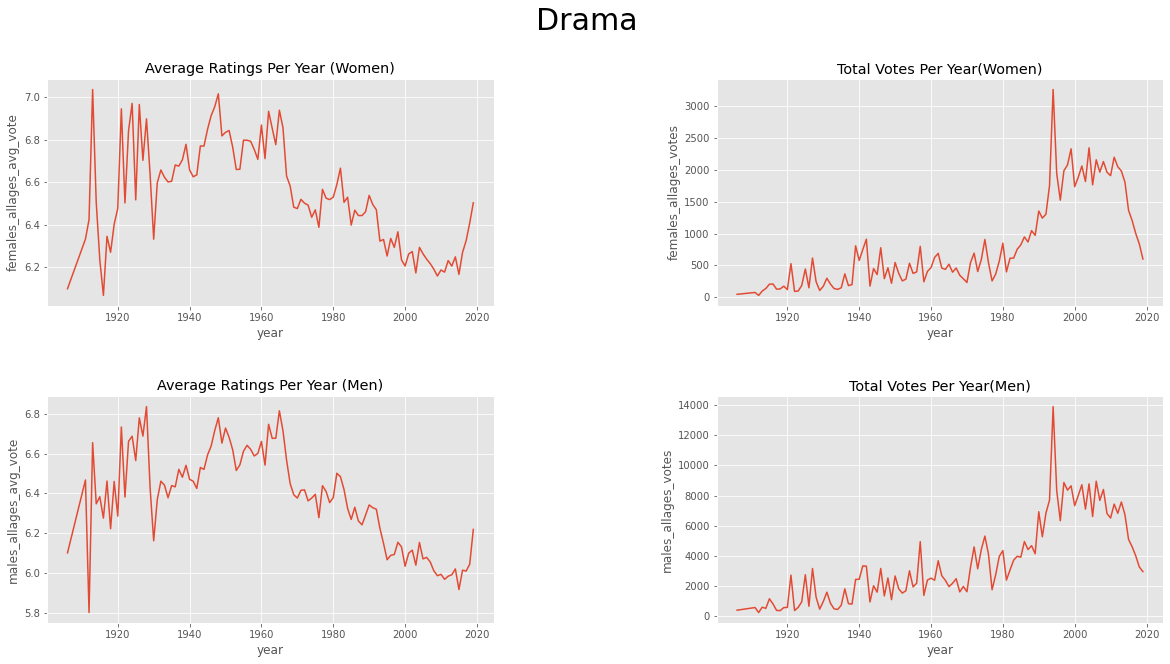

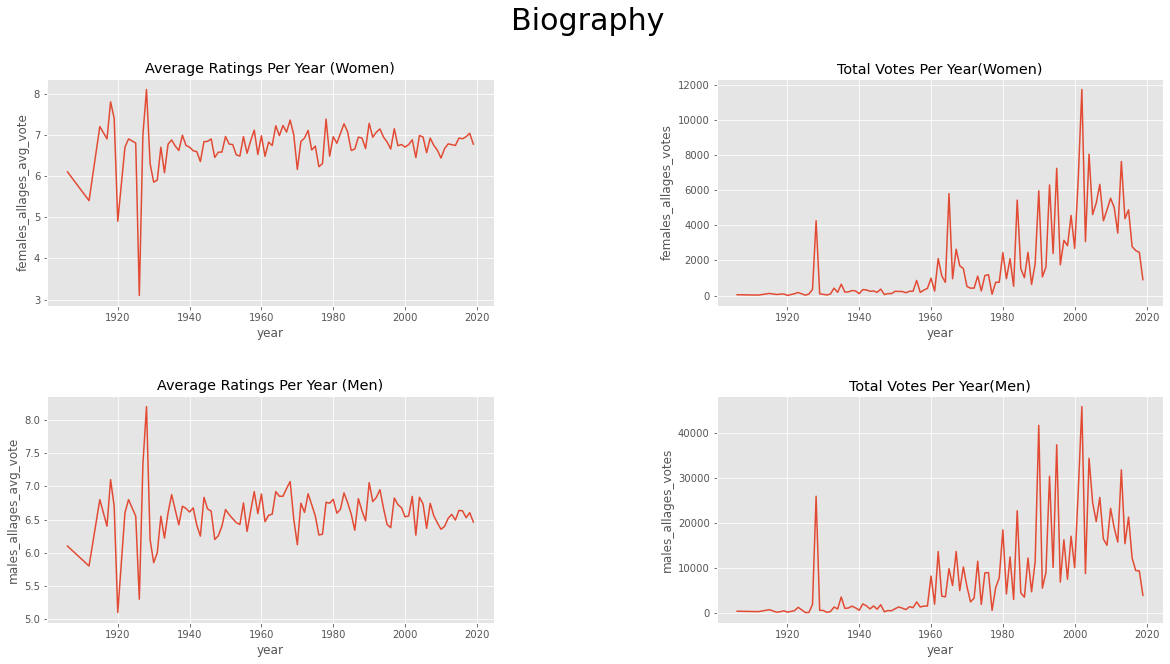

In [42]:
#What's the difference between the ratings given by men and women on each genre of movie?

#Plotting for Comedy
fig, axes = plt.subplots(2,2, figsize=(20,8))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Comedy', fontsize=30)
sns.lineplot(x=df5.groupby(["year"])['females_allages_avg_vote'].mean().index, 
                y=df5.groupby(["year"])['females_allages_avg_vote'].mean(), ax = axes[0])
sns.lineplot(x=df5.groupby(["year"])['females_allages_votes'].mean().index, 
                y=df5.groupby(["year"])['females_allages_votes'].mean(), ax = axes[1])
sns.lineplot(x=df5.groupby(["year"])['males_allages_avg_vote'].mean().index, 
                y=df5.groupby(["year"])['males_allages_avg_vote'].mean(), ax = axes[2])
sns.lineplot(x=df5.groupby(["year"])['males_allages_votes'].mean().index, 
                y=df5.groupby(["year"])['males_allages_votes'].mean(), ax = axes[3])

axes[0].set_title('Average ratings per year (Women)'.title())
axes[1].set_title('Total votes per year(Women)'.title())
axes[2].set_title('Average ratings per year (Men)'.title())
axes[3].set_title('Total votes per year(Men)'.title())

#Plotting for Action
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Action', fontsize=30)
sns.lineplot(x=df6.groupby(["year"])['females_allages_avg_vote'].mean().index, 
                y=df6.groupby(["year"])['females_allages_avg_vote'].mean(), ax = axes[0])
sns.lineplot(x=df6.groupby(["year"])['females_allages_votes'].mean().index, 
                y=df6.groupby(["year"])['females_allages_votes'].mean(), ax = axes[1])
sns.lineplot(x=df6.groupby(["year"])['males_allages_avg_vote'].mean().index, 
                y=df6.groupby(["year"])['males_allages_avg_vote'].mean(), ax = axes[2])
sns.lineplot(x=df6.groupby(["year"])['males_allages_votes'].mean().index, 
                y=df6.groupby(["year"])['males_allages_votes'].mean(), ax = axes[3])

axes[0].set_title('Average ratings per year (Women)'.title())
axes[1].set_title('Total votes per year(Women)'.title())
axes[2].set_title('Average ratings per year (Men)'.title())
axes[3].set_title('Total votes per year(Men)'.title())

#Plotting for Drama
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Drama', fontsize=30)
sns.lineplot(x=df7.groupby(["year"])['females_allages_avg_vote'].mean().index, 
                y=df7.groupby(["year"])['females_allages_avg_vote'].mean(), ax = axes[0])
sns.lineplot(x=df7.groupby(["year"])['females_allages_votes'].mean().index, 
                y=df7.groupby(["year"])['females_allages_votes'].mean(), ax = axes[1])
sns.lineplot(x=df7.groupby(["year"])['males_allages_avg_vote'].mean().index, 
                y=df7.groupby(["year"])['males_allages_avg_vote'].mean(), ax = axes[2])
sns.lineplot(x=df7.groupby(["year"])['males_allages_votes'].mean().index, 
                y=df7.groupby(["year"])['males_allages_votes'].mean(), ax = axes[3])

axes[0].set_title('Average ratings per year (Women)'.title())
axes[1].set_title('Total votes per year(Women)'.title())
axes[2].set_title('Average ratings per year (Men)'.title())
axes[3].set_title('Total votes per year(Men)'.title())

#Plotting for Biography
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)

fig.suptitle('Biography', fontsize=30)
sns.lineplot(x=df8.groupby(["year"])['females_allages_avg_vote'].mean().index, 
                y=df8.groupby(["year"])['females_allages_avg_vote'].mean(), ax = axes[0])
sns.lineplot(x=df8.groupby(["year"])['females_allages_votes'].mean().index, 
                y=df8.groupby(["year"])['females_allages_votes'].mean(), ax = axes[1])
sns.lineplot(x=df8.groupby(["year"])['males_allages_avg_vote'].mean().index, 
                y=df8.groupby(["year"])['males_allages_avg_vote'].mean(), ax = axes[2])
sns.lineplot(x=df8.groupby(["year"])['males_allages_votes'].mean().index, 
                y=df8.groupby(["year"])['males_allages_votes'].mean(), ax = axes[3])

axes[0].set_title('Average ratings per year (Women)'.title())
axes[1].set_title('Total votes per year(Women)'.title())
axes[2].set_title('Average ratings per year (Men)'.title())
axes[3].set_title('Total votes per year(Men)'.title());

## The distribution of the charts suggests the presence of outliers. 
## Here we tried to select some of the most voted movies to see if they match some of these peaks
## These and the other outliers are probably movies Netflix should add to their platform.

## Some of the most voted movies (men)

In [43]:
#Most voted Biography movies (Men)
df8.sort_values("males_allages_votes",ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0108052,Schindler's List,Schindler's List,1993,1994-03-04,Biography,195,USA,"English, Hebrew, German, Polish",Steven Spielberg,"Thomas Keneally, Steven Zaillian",...,8.9,70169.0,8.9,20367.0,8.6,843.0,9.0,170542.0,8.9,476014.0
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,2014-01-17,Biography,180,USA,"English, French",Martin Scorsese,"Terence Winter, Jordan Belfort",...,7.7,52808.0,7.5,9326.0,7.8,775.0,8.1,105532.0,8.1,419911.0
tt0099685,Goodfellas,Goodfellas,1990,1990-11-23,Biography,146,USA,"English, Italian",Martin Scorsese,"Nicholas Pileggi, Nicholas Pileggi",...,8.3,36886.0,8.3,13483.0,8.5,864.0,8.9,171202.0,8.6,388702.0
tt0112573,Braveheart,Braveheart,1995,1995-09-08,Biography,178,USA,"English, French, Latin, Scottish Gaelic, Italian",Mel Gibson,Randall Wallace,...,8.0,53630.0,8.0,14867.0,8.0,852.0,8.4,153405.0,8.3,389627.0
tt0268978,A Beautiful Mind,A Beautiful Mind,2001,2002-03-01,Biography,135,USA,English,Ron Howard,"Akiva Goldsman, Sylvia Nasar",...,8.1,53988.0,8.0,12043.0,7.6,821.0,8.0,106436.0,8.2,347509.0
tt0264464,Catch Me If You Can,Catch Me If You Can,2002,2003-01-31,Biography,141,"USA, Canada","English, French",Steven Spielberg,"Jeff Nathanson, Frank Abagnale Jr.",...,7.9,47290.0,7.8,9627.0,7.7,841.0,8.0,105409.0,8.0,324794.0
tt1675434,The Intouchables,Intouchables,2011,2011-11-02,Biography,112,France,"French, English","Olivier Nakache, Éric Toledano","Olivier Nakache, Philippe Pozzo di Borgo",...,8.7,45821.0,8.5,7436.0,7.5,589.0,8.3,35071.0,8.5,327645.0
tt0253474,The Pianist,The Pianist,2002,2003-01-24,Biography,150,"UK, France, Poland, Germany","English, German, Russian",Roman Polanski,"Ronald Harwood, Wladyslaw Szpilman",...,8.6,46172.0,8.4,9398.0,8.1,733.0,8.4,79039.0,8.5,311580.0
tt1663202,The Revenant,The Revenant,2015,2016-01-15,Biography,156,"USA, Hong Kong, Taiwan","English, Pawnee, French",Alejandro G. Iñárritu,"Mark L. Smith, Alejandro G. Iñárritu",...,7.7,29222.0,7.8,6202.0,7.7,713.0,8.1,63520.0,7.9,257757.0


In [44]:
#Most voted drama movies (Men)
df7.sort_values("males_allages_votes",ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0468569,The Dark Knight,The Dark Knight,2008,2008-07-24,Drama,152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.6,107168.0,8.2,17834.0,8.5,936.0,9.1,341457.0,8.9,840976.0
tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,1995-03-03,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",...,9.2,114034.0,9.2,30244.0,8.9,908.0,9.3,317647.0,9.2,862970.0
tt0137523,Fight Club,Fight Club,1999,1999-11-12,Drama,139,"USA, Germany",English,David Fincher,"Chuck Palahniuk, Jim Uhls",...,8.7,101751.0,8.1,18477.0,8.2,884.0,8.7,257398.0,8.8,709603.0
tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,Drama,154,USA,"English, Spanish, French",Quentin Tarantino,"Quentin Tarantino, Roger Avary",...,8.5,87272.0,8.3,23085.0,8.6,911.0,8.9,267977.0,8.9,693319.0
tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-07,Drama,142,USA,English,Robert Zemeckis,"Winston Groom, Eric Roth",...,8.7,105217.0,8.5,24461.0,8.3,920.0,8.7,245705.0,8.8,652258.0
tt0068646,The Godfather,The Godfather,1972,1972-08-25,Drama,175,USA,"English, Italian, Latin",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",...,8.9,65243.0,8.9,20479.0,9.0,893.0,9.2,239064.0,9.2,613514.0
tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,2003-12-17,Drama,201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.7,89977.0,8.8,19721.0,8.6,907.0,8.9,229137.0,8.9,640992.0
tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,2001-12-19,Drama,178,"New Zealand, USA","English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.7,94404.0,8.8,22271.0,8.6,926.0,8.8,236437.0,8.8,644730.0
tt0167261,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,2002,2002-12-18,Drama,179,"New Zealand, USA","English, Sindarin, Old English",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.6,83857.0,8.6,18993.0,8.5,910.0,8.7,208996.0,8.7,581137.0


In [45]:
#Most voted Action movies (Men)
df6.sort_values("males_allages_votes",ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0468569,The Dark Knight,The Dark Knight,2008,2008-07-24,Action,152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.6,107168.0,8.2,17834.0,8.5,936.0,9.1,341457.0,8.9,840976.0
tt1375666,Inception,Inception,2010,2010-07-16,Action,148,"USA, UK","English, Japanese, French",Christopher Nolan,Christopher Nolan,...,8.6,109096.0,8.1,17851.0,8.2,887.0,8.7,238758.0,8.7,776685.0
tt0133093,The Matrix,The Matrix,1999,1999-06-11,Action,136,USA,English,"Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski",...,8.4,85207.0,8.4,21447.0,8.4,917.0,8.6,240350.0,8.7,646382.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,2012-07-20,Action,164,"UK, USA","English, Arabic",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.3,63159.0,8.0,10630.0,7.9,863.0,8.3,178309.0,8.3,547292.0
tt0372784,Batman Begins,Batman Begins,2005,2005-06-16,Action,140,"USA, UK","English, Urdu, Mandarin",Christopher Nolan,"Bob Kane, David S. Goyer",...,8.0,58956.0,7.9,11076.0,8.1,923.0,8.3,202688.0,8.2,508001.0
tt0172495,Gladiator,Gladiator,2000,2000-05-12,Action,155,"USA, UK, Malta, Morocco",English,Ridley Scott,"David Franzoni, David Franzoni",...,8.2,68551.0,8.2,17177.0,8.1,882.0,8.5,186497.0,8.5,527842.0
tt0848228,The Avengers,The Avengers,2012,2012-04-26,Action,143,USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",...,8.1,61844.0,8.2,12594.0,7.5,866.0,8.3,160904.0,7.9,462139.0
tt0076759,Star Wars,Star Wars,1977,1977-12-27,Action,121,USA,English,George Lucas,George Lucas,...,8.4,52248.0,8.7,18196.0,8.6,920.0,8.9,224057.0,8.5,443071.0
tt0499549,Avatar,Avatar,2009,2009-12-17,Action,162,USA,"English, Spanish",James Cameron,James Cameron,...,7.8,70455.0,7.9,13640.0,7.3,879.0,7.7,163367.0,7.8,509994.0


In [46]:
#Most voted Comedy movies (Men)
df5.sort_values("males_allages_votes",ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0088763,Back to the Future,Back to the Future,1985,1985-12-04,Comedy,116,USA,English,Robert Zemeckis,"Robert Zemeckis, Bob Gale",...,8.4,54635.0,8.2,15111.0,8.5,921.0,8.6,167306.0,8.5,390512.0
tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,2014-07-31,Comedy,121,USA,English,James Gunn,"James Gunn, Nicole Perlman",...,8.0,44717.0,8.1,10350.0,7.7,848.0,8.3,119122.0,7.9,351395.0
tt0120382,The Truman Show,The Truman Show,1998,1998-10-09,Comedy,103,USA,English,Peter Weir,Andrew Niccol,...,7.9,55934.0,7.6,11585.0,8.0,861.0,8.0,129319.0,8.1,377671.0
tt1049413,Up,Up,2009,2009-10-09,Comedy,96,USA,English,"Pete Docter, Bob Peterson","Pete Docter, Bob Peterson",...,8.4,62331.0,8.3,10392.0,7.8,806.0,8.4,128373.0,8.2,368735.0
tt0266543,Finding Nemo,Finding Nemo,2003,2003-10-10,Comedy,100,"USA, Australia",English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",...,8.3,67468.0,8.4,12402.0,7.8,823.0,8.3,140008.0,8.0,371416.0
tt0208092,Snatch,Snatch,2000,2000-09-01,Comedy,104,"UK, USA","English, Russian",Guy Ritchie,Guy Ritchie,...,8.1,38098.0,7.8,7024.0,7.3,808.0,8.2,103080.0,8.3,356638.0
tt0114709,Toy Story,Toy Story,1995,1996-03-22,Comedy,81,USA,English,John Lasseter,"John Lasseter, Pete Docter",...,8.1,50985.0,8.3,11568.0,8.1,847.0,8.6,144662.0,8.2,328103.0
tt1431045,Deadpool,Deadpool,2016,2016-02-10,Comedy,108,USA,English,Tim Miller,"Rhett Reese, Paul Wernick",...,7.9,35699.0,7.9,6875.0,7.4,801.0,8.1,88591.0,7.8,299776.0
tt0118715,The Big Lebowski,The Big Lebowski,1998,1998-04-24,Comedy,117,"USA, UK","English, German, Hebrew, Spanish","Joel Coen, Ethan Coen","Ethan Coen, Joel Coen",...,7.8,33363.0,7.8,8874.0,7.8,837.0,8.3,130915.0,8.0,300630.0


## Some of the most voted movies (Women)

In [47]:
#Most voted Biography movies (Women)
df8.sort_values('females_allages_votes',ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0108052,Schindler's List,Schindler's List,1993,1994-03-04,Biography,195,USA,"English, Hebrew, German, Polish",Steven Spielberg,"Thomas Keneally, Steven Zaillian",...,8.9,70169.0,8.9,20367.0,8.6,843.0,9.0,170542.0,8.9,476014.0
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,2014-01-17,Biography,180,USA,"English, French",Martin Scorsese,"Terence Winter, Jordan Belfort",...,7.7,52808.0,7.5,9326.0,7.8,775.0,8.1,105532.0,8.1,419911.0
tt0268978,A Beautiful Mind,A Beautiful Mind,2001,2002-03-01,Biography,135,USA,English,Ron Howard,"Akiva Goldsman, Sylvia Nasar",...,8.1,53988.0,8.0,12043.0,7.6,821.0,8.0,106436.0,8.2,347509.0
tt1675434,The Intouchables,Intouchables,2011,2011-11-02,Biography,112,France,"French, English","Olivier Nakache, Éric Toledano","Olivier Nakache, Philippe Pozzo di Borgo",...,8.7,45821.0,8.5,7436.0,7.5,589.0,8.3,35071.0,8.5,327645.0
tt1504320,The King's Speech,The King's Speech,2010,2011-01-07,Biography,118,"UK, USA, Australia",English,Tom Hooper,David Seidler,...,8.2,50718.0,8.4,11902.0,7.8,750.0,8.1,78684.0,8.0,291907.0
tt0264464,Catch Me If You Can,Catch Me If You Can,2002,2003-01-31,Biography,141,"USA, Canada","English, French",Steven Spielberg,"Jeff Nathanson, Frank Abagnale Jr.",...,7.9,47290.0,7.8,9627.0,7.7,841.0,8.0,105409.0,8.0,324794.0
tt0253474,The Pianist,The Pianist,2002,2003-01-24,Biography,150,"UK, France, Poland, Germany","English, German, Russian",Roman Polanski,"Ronald Harwood, Wladyslaw Szpilman",...,8.6,46172.0,8.4,9398.0,8.1,733.0,8.4,79039.0,8.5,311580.0
tt2084970,The Imitation Game,The Imitation Game,2014,2014-11-14,Biography,114,"UK, USA","English, German",Morten Tyldum,"Graham Moore, Andrew Hodges",...,8.1,37774.0,8.2,8119.0,7.4,711.0,7.9,57660.0,8.0,269876.0
tt0112573,Braveheart,Braveheart,1995,1995-09-08,Biography,178,USA,"English, French, Latin, Scottish Gaelic, Italian",Mel Gibson,Randall Wallace,...,8.0,53630.0,8.0,14867.0,8.0,852.0,8.4,153405.0,8.3,389627.0


In [48]:
#Most voted Drama movies (Women)
df7.sort_values('females_allages_votes',ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,1995-03-03,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",...,9.2,114034.0,9.2,30244.0,8.9,908.0,9.3,317647.0,9.2,862970.0
tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-07,Drama,142,USA,English,Robert Zemeckis,"Winston Groom, Eric Roth",...,8.7,105217.0,8.5,24461.0,8.3,920.0,8.7,245705.0,8.8,652258.0
tt0468569,The Dark Knight,The Dark Knight,2008,2008-07-24,Drama,152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.6,107168.0,8.2,17834.0,8.5,936.0,9.1,341457.0,8.9,840976.0
tt0137523,Fight Club,Fight Club,1999,1999-11-12,Drama,139,"USA, Germany",English,David Fincher,"Chuck Palahniuk, Jim Uhls",...,8.7,101751.0,8.1,18477.0,8.2,884.0,8.7,257398.0,8.8,709603.0
tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,2001-12-19,Drama,178,"New Zealand, USA","English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.7,94404.0,8.8,22271.0,8.6,926.0,8.8,236437.0,8.8,644730.0
tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,2003-12-17,Drama,201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.7,89977.0,8.8,19721.0,8.6,907.0,8.9,229137.0,8.9,640992.0
tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,Drama,154,USA,"English, Spanish, French",Quentin Tarantino,"Quentin Tarantino, Roger Avary",...,8.5,87272.0,8.3,23085.0,8.6,911.0,8.9,267977.0,8.9,693319.0
tt0120338,Titanic,Titanic,1997,1998-01-23,Drama,194,USA,"English, Swedish, Italian",James Cameron,James Cameron,...,7.9,80177.0,7.8,16464.0,7.3,897.0,7.7,154673.0,7.7,417277.0
tt0167261,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,2002,2002-12-18,Drama,179,"New Zealand, USA","English, Sindarin, Old English",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",...,8.6,83857.0,8.6,18993.0,8.5,910.0,8.7,208996.0,8.7,581137.0


In [49]:
##Most voted Action movies (Women)
df6.sort_values('females_allages_votes',ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt1375666,Inception,Inception,2010,2010-07-16,Action,148,"USA, UK","English, Japanese, French",Christopher Nolan,Christopher Nolan,...,8.6,109096.0,8.1,17851.0,8.2,887.0,8.7,238758.0,8.7,776685.0
tt0468569,The Dark Knight,The Dark Knight,2008,2008-07-24,Action,152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.6,107168.0,8.2,17834.0,8.5,936.0,9.1,341457.0,8.9,840976.0
tt1392170,The Hunger Games,The Hunger Games,2012,2012-03-23,Action,142,USA,English,Gary Ross,"Gary Ross, Suzanne Collins",...,7.6,63943.0,7.6,12440.0,6.7,808.0,7.4,117038.0,7.1,338010.0
tt0133093,The Matrix,The Matrix,1999,1999-06-11,Action,136,USA,English,"Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski",...,8.4,85207.0,8.4,21447.0,8.4,917.0,8.6,240350.0,8.7,646382.0
tt0848228,The Avengers,The Avengers,2012,2012-04-26,Action,143,USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",...,8.1,61844.0,8.2,12594.0,7.5,866.0,8.3,160904.0,7.9,462139.0
tt0325980,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,2003,2003-08-08,Action,143,USA,English,Gore Verbinski,"Ted Elliott, Terry Rossio",...,8.1,68829.0,8.0,13746.0,7.7,901.0,8.1,158482.0,8.0,427837.0
tt0499549,Avatar,Avatar,2009,2009-12-17,Action,162,USA,"English, Spanish",James Cameron,James Cameron,...,7.8,70455.0,7.9,13640.0,7.3,879.0,7.7,163367.0,7.8,509994.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,2012-07-20,Action,164,"UK, USA","English, Arabic",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",...,8.3,63159.0,8.0,10630.0,7.9,863.0,8.3,178309.0,8.3,547292.0
tt0172495,Gladiator,Gladiator,2000,2000-05-12,Action,155,"USA, UK, Malta, Morocco",English,Ridley Scott,"David Franzoni, David Franzoni",...,8.2,68551.0,8.2,17177.0,8.1,882.0,8.5,186497.0,8.5,527842.0


In [50]:
#Most voted Comedy movies (Women)
df5.sort_values('females_allages_votes',ascending=False).head(10)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0266543,Finding Nemo,Finding Nemo,2003,2003-10-10,Comedy,100,"USA, Australia",English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",...,8.3,67468.0,8.4,12402.0,7.8,823.0,8.3,140008.0,8.0,371416.0
tt1049413,Up,Up,2009,2009-10-09,Comedy,96,USA,English,"Pete Docter, Bob Peterson","Pete Docter, Bob Peterson",...,8.4,62331.0,8.3,10392.0,7.8,806.0,8.4,128373.0,8.2,368735.0
tt0211915,Amélie,Le fabuleux destin d'Amélie Poulain,2001,2001-10-05,Comedy,122,"France, Germany","French, Russian, English",Jean-Pierre Jeunet,"Guillaume Laurant, Jean-Pierre Jeunet",...,8.6,67770.0,8.3,11231.0,7.6,738.0,8.4,85908.0,8.3,330082.0
tt1045658,Silver Linings Playbook,Silver Linings Playbook,2012,2012-11-21,Comedy,122,USA,English,David O. Russell,"David O. Russell, Matthew Quick",...,7.6,54523.0,7.7,9993.0,7.0,758.0,8.0,86470.0,7.6,277723.0
tt0198781,"Monsters, Inc.","Monsters, Inc.",2001,2002-02-08,Comedy,92,USA,English,"Pete Docter, David Silverman","Pete Docter, Jill Culton",...,8.2,52288.0,8.2,10280.0,7.9,817.0,8.1,120394.0,8.0,309931.0
tt2294629,Frozen,Frozen,2013,2013-12-06,Comedy,102,USA,"English, Norwegian","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen",...,7.8,44223.0,7.7,7752.0,7.0,711.0,7.5,69230.0,7.4,204728.0
tt0114709,Toy Story,Toy Story,1995,1996-03-22,Comedy,81,USA,English,John Lasseter,"John Lasseter, Pete Docter",...,8.1,50985.0,8.3,11568.0,8.1,847.0,8.6,144662.0,8.2,328103.0
tt0120382,The Truman Show,The Truman Show,1998,1998-10-09,Comedy,103,USA,English,Peter Weir,Andrew Niccol,...,7.9,55934.0,7.6,11585.0,8.0,861.0,8.0,129319.0,8.1,377671.0
tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,2014-07-31,Comedy,121,USA,English,James Gunn,"James Gunn, Nicole Perlman",...,8.0,44717.0,8.1,10350.0,7.7,848.0,8.3,119122.0,7.9,351395.0
